<a href="https://colab.research.google.com/github/brandon-mason/cs4337-collabs/blob/main/QuestionWarmUpPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment Introduction:

In this assignment, the objective is to assess and enhance your Python programming skills by building a comprehensive data analysis project. You will develop a `DataConfig` class for generating synthetic data and an `AdvancedDataAnalyzer` class for performing various operations like statistical analysis, data filtering, and visualization. The project is designed to test your understanding of object-oriented programming (OOP), decorators, and the use of key libraries such as `pandas`, `numpy`, `matplotlib`, and `param`.

You are expected to approach the project incrementally. Begin by developing small parts of the functionality, testing each as you go. Utilize Google Colab's scratch-code cells feature for this purpose, where you can write temporary test code for each function before moving on to the next. Incremental development and testing will help ensure that each component works correctly before combining them into the final project.

**RUBRICS**

### **Code Completion**

| **Code Completion**            |                                                                                                       |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| **Excellent (90-100%)**        | All functions fully implemented as required, including decorators, data generation, analysis, filtering, and saving functionalities. |
| **Good (70-89%)**              | Most functions implemented with minor missing details or errors.                                       |
| **Satisfactory (50-69%)**      | Partial implementation, significant parts missing or incomplete, but the core structure is present.    |
| **Needs Improvement (0-49%)**  | Minimal implementation, many core functions missing or non-functional.                                |
| **Weight**                     | 50%                                                                                                  |

---

### **Unit Test Pass**

| **Unit Test Pass**             |                                                                                                       |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| **Excellent (90-100%)**        | All unit tests pass successfully with no errors.                                                      |
| **Good (70-89%)**              | Most unit tests pass, minor issues with a few test cases.                                              |
| **Satisfactory (50-69%)**      | Some unit tests pass, but significant errors or test failures occur.                                   |
| **Needs Improvement (0-49%)**  | Most or all unit tests fail, indicating major issues with the implementation.                          |
| **Weight**                     | 30%                                                                                                  |

---

### **Docstrings and Comments**

| **Docstrings and Comments**     |                                                                                                       |
|---------------------------------|-------------------------------------------------------------------------------------------------------|
| **Excellent (90-100%)**         | All functions are properly documented with clear, concise docstrings explaining the purpose, inputs, and outputs. In-code comments are provided where necessary. |
| **Good (70-89%)**               | Most functions have proper docstrings, but a few are missing or unclear. Comments are mostly appropriate. |
| **Satisfactory (50-69%)**       | Docstrings are present but incomplete or unclear. Minimal in-code comments.                            |
| **Needs Improvement (0-49%)**   | Little to no docstrings or comments provided, or comments are incorrect/misleading.                    |
| **Weight**                      | 20%                                                                                                   |

These three separate tables provide a clear breakdown of the assignment grading criteria for code completion, unit test success, and documentation.

# Project Structure

Here’s a detailed guide explaining how to tackle each function and class in your implementation, along with usage examples, expected inputs, and outputs.

### 1. **Class: `DataConfig`**

The `DataConfig` class is responsible for configuring and generating synthetic data based on various parameters. It automatically regenerates data whenever any configuration parameters change.

#### Key Parameters:
- `random_seed`: Sets the random seed for reproducibility.
- `num_samples`: Number of samples to generate (default 1000).
- `age`: Range of ages (tuple of floats, default `(18.0, 80.0)`).
- `height`: Height values (tuple of floats, default `(165.0, 10.0)` for mean and standard deviation).
- `weight`: Weight values (tuple of floats, default `(70.0, 15.0)`).
- `income`: Income values (tuple of floats, default `(50000.0, 15000.0)`).
- `expenditure`: Expenditure values as a factor of income (tuple of floats, default `(0.6, 0.1)`).
- `gender`: List selector for gender options, including `'Male'`, `'Female'`, and `'Other'`.

#### Functions:
- **_generate()**: Automatically generates synthetic data whenever a parameter changes.
- **data**: Property that returns the generated dataset (a pandas DataFrame).

#### Usage:

```python
# Initialize DataConfig with default parameters
config = DataConfig()

# Access the generated data
data = config.data
print(data.head())

# Change the number of samples and regenerate the data
config.num_samples = 500
new_data = config.data
print(len(new_data))  # Should print 500 as the new length
```

**Expected Output:**

```
    Age      Height      Weight        Income  Expenditure  Gender
0   50  168.248691   80.000451  55641.779379  31260.843872    Male
1   69  171.232334   88.092898  48825.385468  28636.106034  Female
2   60  169.732534   53.858662  60739.667523  35178.519206    Male
3   28  163.592334   61.824884  44189.589121  26071.507426  Female
4   73  151.606634   75.938644  33085.981912  18912.423281  Female
```

---

### 2. **Class: `AdvancedDataAnalyzer`**

This class is built around the `DataConfig` object and provides analysis, filtering, visualization, and data saving functionality.

#### Key Methods:
- **calculate_statistics()**: Calculates and returns statistics like mean, median, variance, and correlation matrix.
- **group_by_column(column)**: Groups the data by the specified column and returns aggregated means.
- **apply_function(column, func)**: Applies a custom function to the specified column (e.g., lambda function).
- **filter_data(column, condition)**: Filters data based on a condition applied to a column.
- **lazy_filter(column, condition)**: Lazily filters data (yields results one at a time) based on a condition.
- **visualize_relationship(column_x, column_y)**: Plots a scatter plot to visualize the relationship between two columns.
- **visualize_distribution(column)**: Plots a histogram of the specified column to visualize the distribution.
- **save_data(format, file_path, **kwargs)**: Saves the data to disk in the specified format (`csv`, `parquet`, or `npz`).

#### Usage:

```python
# Initialize DataConfig and AdvancedDataAnalyzer
config = DataConfig()
analyzer = AdvancedDataAnalyzer(config)

# Calculate statistics
stats = analyzer.calculate_statistics()
print(stats)

# Group by the 'Gender' column and return means
grouped = analyzer.group_by_column('Gender')
print(grouped)

# Apply a 10% increase to the 'Income' column
increased_income = analyzer.apply_function('Income', lambda x: x * 1.1)
print(increased_income.head())

# Filter data where 'Age' is greater than 50
filtered_data = analyzer.filter_data('Age', lambda x: x > 50)
print(filtered_data.head())

# Save the data as a CSV file
analyzer.save_data(format='csv', file_path="synthetic_data")
```

#### Example Output:

1. **Statistics Calculation:**
    ```python
    {
        'mean': {'Age': 49.5, 'Height': 165.42, 'Weight': 70.55, 'Income': 50000.23},
        'median': {'Age': 50, 'Height': 165.01, 'Weight': 70.34, 'Income': 49999.89},
        'variance': {'Age': 304.55, 'Height': 12.34, 'Weight': 15.67, 'Income': 22500123.45},
        'correlation_matrix': {'Age': {'Age': 1.0, 'Income': 0.02}, 'Height': {'Height': 1.0}}
    }
    ```

2. **Grouping by Column (`Gender`):**
    ```python
                Age      Height     Weight        Income
    Gender                                          
    Female  49.213    164.985      71.048   51000.123
    Male    50.456    165.876      69.893   49000.321
    Other   48.765    165.332      70.123   49500.456
    ```

3. **Filtered Data (Age > 50):**
    ```python
        Age      Height      Weight        Income  Expenditure  Gender
    2   51  163.43          72.32        50234.2    30140.3       Male
    4   55  162.51          74.29        51923.1    31015.9       Other
    ```

4. **File Saved Output (save as CSV):**
    ```python
    Data saved to synthetic_data.csv
    ```

---

### 3. **Data Visualization Functions**
These functions help visualize relationships and distributions in your dataset.

#### Usage:

```python
# Visualize relationship between 'Income' and 'Expenditure'
analyzer.visualize_relationship('Income', 'Expenditure')

# Visualize the distribution of 'Age'
analyzer.visualize_distribution('Age')
```

- **`visualize_relationship()`**: Plots a scatter plot between two columns (e.g., Income vs. Expenditure).
- **`visualize_distribution()`**: Plots a histogram of a specific column to understand the distribution (e.g., Age).

**Expected Behavior:**
- These functions will render visualizations directly within the Jupyter notebook or Python environment with graphical output (using matplotlib).

---

### Sample Workflow:

```python
# Step 1: Initialize Config and Analyzer
config = DataConfig()
analyzer = AdvancedDataAnalyzer(config)

# Step 2: Analyze data
stats = analyzer.calculate_statistics()
print("Statistics:", stats)

# Step 3: Group data by Gender
grouped_data = analyzer.group_by_column("Gender")
print(grouped_data)

# Step 4: Filter data where Age > 50
filtered_data = analyzer.filter_data("Age", lambda x: x > 50)
print(filtered_data)

# Step 5: Save data to CSV
analyzer.save_data(format="csv", file_path="synthetic_data")

# Step 6: Visualize the relationship between Income and Expenditure
analyzer.visualize_relationship("Income", "Expenditure")
```

---

# IMPLEMENTATION

## Start here with imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pyarrow.parquet as pq
import param
from typing import Tuple

## Task 1: Decorator - log_time

## Instructions


### Implementation Steps:
- **Step 1**: Import the `time` module to measure execution time.
- **Step 2**: Define the `log_time` function, which will act as the decorator.
- **Step 3**: Inside `log_time`, create a `wrapper` function that accepts any arguments (`*args, **kwargs`).
- **Step 4**: Capture the start time before the target function is executed.
- **Step 5**: Call the target function and store the result.
- **Step 6**: Capture the end time after the function completes.
- **Step 7**: Calculate the execution time by subtracting the start time from the end time.
```python
print(f"Execution time for {func.__name__}: {end_time - start_time:.4f} seconds")
```
- **Step 8**: Print the execution time along with the function name.
- **Step 9**: Return the result of the target function from the `wrapper`.

### Using `log_time` as a Wrapper:
- **Step 1**: Define your function normally.
- **Step 2**: Place `@log_time` above the function definition to apply the decorator.
- **Step 3**: When the function is called, the execution time will be printed automatically.
Example usage
```python
  @log_time
  def hello():
    time.sleep(5)
  hello()
```
  **Sample Output**
  ```text
  Execution time for hello: 5.0047 seconds
```

## Implement
***Note: For each function provide appropriate docstrings and type hinting***

In [ ]:
# Decorator to log the execution time of functions
import time

def log_time(func): # !!! TODO TYPE HINTING
    """
    This function creates a decorator that calculates the execution time of a
    function and then prints it to the console.
    """
    print("exec")
    def wrapper(*args, **kwargs):
      start_time = time.time()
      result = func(*args, **kwargs)
      end_time = time.time()
      exec_time = end_time - start_time
      print(f"Execution time for {func.__name__}: {exec_time:.4f} seconds")
      return result
    return wrapper

@log_time
def test():
  time.sleep(5)
  return "hehe"
test()


exec
Execution time for test: 5.0002 seconds


'hehe'

# Task 2: DataConfig

## Instructions

### 1. `_generate` function

#### Understand following to Implement `_generate` Function:

- **Step 1**: Define the `_generate` function inside the `DataConfig` class. It should be responsible for generating a synthetic dataset.
- **Step 2**: Use the `np.random.seed()` to set the seed for random number generation to ensure reproducibility.
- **Step 3**: Create an empty pandas DataFrame to store the generated data in `self._data` variable, use `size` arguments to pass `num_samples`.
- **Step 4**: Use `np.random.randint()` to generate random integer values for the `Age` column based on the specified `age` range and `num_samples` use `size` arguments to pass `num_samples`.
- **Step 5**: Use `np.random.normal()` to generate random values for `Height`, `Weight`, `Income`, and `Expenditure` based on their respective mean and standard deviation, use `size` arguments to pass `num_samples`. Only for `Expenditure` multiply it with `Income` to create final `Expenditure`


- **Step 6**: Use `np.random.choice()`, use `size` arguments to pass `num_samples`, to randomly assign gender values from `self.gender` to the `Gender` column.
- **Step 7**: Store the generated data in a DataFrame as the class's `_data` attribute.
- **Step 8**: The function will automatically regenerate data when parameters like `'num_samples', 'age', 'height', 'weight', 'income', 'expenditure', 'gender'` change, thanks to the `param.depends` decorator with final arguments `watch=True`.

#### Using `_generate` Function in `DataConfig`:
- **Step 1**: The `_generate` function is automatically triggered when any of the relevant parameters (`num_samples`, `age`, etc.) change.
- **Step 2**: The function updates the internal `_data` DataFrame with newly generated data.
- **Step 3**: You can access the generated data by calling the `data` property of the `DataConfig` class, which will return the updated DataFrame.

### 2. `_data` Property

#### Understand following to create `_data` Property:

- **Step 1**: `_data` is a private attribute within the `DataConfig` class that stores the generated dataset in the form of a pandas DataFrame.
  
- **Step 2**: The `_data` attribute is populated by the `_generate` function whenever synthetic data is created or regenerated. This ensures the data is up-to-date with the latest parameter values (e.g., `num_samples`, `age`, `height`).

- **Step 3**: The `data` property method provides a public interface to access the private `_data` attribute. The reason for making `_data` private (using the underscore prefix) is to prevent direct manipulation of the DataFrame, ensuring that data can only be accessed via the `data` property.

- **Step 4**: The `data` property is defined using the `@property` decorator, which makes it behave like an attribute. This allows users to access the data by simply calling `config.data` without needing to call it like a method (`config.data()`).

## Implementation
***Note: For each function provide appropriate docstrings and type hinting***

In [ ]:
class DataConfig(param.Parameterized):
    """
    A class to configure and generate synthetic data.
    This class automatically regenerates data when parameters like num_samples, age, height, etc. change.
    Here age, height, weight, income, expenditure configs represent mean[0] and standard deviation[1] values.
    """
    random_seed: int = param.Integer(default = 111, bounds = (1, None))
    num_samples: int = param.Integer(default=1000, bounds=(1, None))
    age: Tuple[float, float] = param.NumericTuple(default=(18.0, 80.0), length=2)
    height: Tuple[float, float] = param.NumericTuple(default=(165.0, 10.0), length=2)
    weight: Tuple[float, float] = param.NumericTuple(default=(70.0, 15.0), length=2)
    income: Tuple[float, float] = param.NumericTuple(default=(50000.0, 15000.0), length=2)
    expenditure: Tuple[float, float] = param.NumericTuple(default=(0.6, 0.1), length=2)
    gender: str = param.ListSelector(default=['Male', 'Female', 'Other'], objects=['Male', 'Female', 'Other'])
    _data: pd.DataFrame = param.DataFrame(default=pd.DataFrame())

    def __init__(self, **params):
        super().__init__(**params)
        self._generate()

    @param.depends('num_samples', 'age', 'height', 'weight', 'income', 'expenditure', 'gender', watch=True)
    def _generate(self, *events) -> pd.DataFrame:
        """
        This function uses the mean and standard deviation values provided by the classes parameters to generate random
        values for each field.
        The values are generated using a normal distribution and are stored in a table like data structure.
        """
        np.random.seed(self.random_seed)

        age_col = np.random.randint(low=self.age[0], high=self.age[1], size=self.num_samples)

        height_col = np.random.normal(loc=self.height[0], scale=self.height[1], size=self.num_samples)

        weight_col = np.random.normal(loc=self.weight[0], scale=self.weight[1], size=self.num_samples)

        income_col = np.random.normal(loc=self.income[0], scale=self.income[1], size=self.num_samples)

        expend_col = np.random.normal(loc=self.expenditure[0], scale=self.expenditure[1], size=self.num_samples) * income_col

        gender_col = np.random.choice(a=self.gender, size=self.num_samples)

        data = pd.DataFrame({"Age": age_col, "Height": height_col, "Weight": weight_col, "Income": income_col, "Expenditure": expend_col, "Gender": gender_col})
        self._data = data
        print(f"New Data Generated!!!")
        return data

    @property
    def data(self) -> pd.DataFrame:
        """
        Acts as a "getter" function for self._data.
        Using the property decorator protects _data from being edited from outside the class.
        """
        return self._data

    def __repr__(self):
        return str(self.param)

a = DataConfig()

New Data Generated!!!


# Task 3: AdvancedDataAnalyzer

## Instructions

Step-by-step guide for each function in the `AdvancedDataAnalyzer` class

---

### 1. **`__init__(self, config)`**

#### Purpose:
- Initialize the `AdvancedDataAnalyzer` by taking a `DataConfig` instance as input. It accesses the data from the config instance and initializes a statistics dictionary.

#### Steps:
- **Step 1**: Store the passed `config` object in `self.config`.
- **Step 2**: Initialize `self._data` to point to `config.data`, which contains the generated dataset.
- **Step 3**: Initialize an empty dictionary `self._statistics` to store calculated statistics.

#### Expected Usage:
```python
config = DataConfig()
analyzer = AdvancedDataAnalyzer(config)
```

---
### 2. **`data` property**
- Returns `config.data`
#### Steps:
- ** Step 1**: Define `data` `property` using `@property` decorator and return `self.config.data`
---

### 3. **`calculate_statistics(self)`**

#### Purpose:
- Calculate basic statistics (mean, median, variance, correlation matrix) for numeric columns.

#### Steps:
- **Step 1**: Calculate the mean, median, variance, and correlation matrix using pandas methods (`mean()`, `median()`, `var()`, `corr()`). You might want to use `numeric_only=True` flags. `self.data.mean(numeric_only=True)`
- **Step 3**: Use `log_time` decorator
- **Step 2**: Store these statistics in `self._statistics` and return the dictionary.

#### Expected Usage:
```python
stats = analyzer.calculate_statistics()
print(stats)
```

---

### 4. **`group_by_column(self, column)`**

#### Purpose:
- Group the data by the specified column and calculate the mean for each group.

#### Steps:
- **Step 1**: Check if the column exists in `self._data`.
- **Step 2**: Use `groupby()` on the specified column and calculate the mean for each group.
- **Step 3**: Return the resulting grouped DataFrame.

#### Expected Usage:
```python
grouped_data = analyzer.group_by_column('Gender')
print(grouped_data)
```

---

### 5. **`apply_function(self, column, func)`**

#### Purpose:
- Apply a custom function to all values in the specified column and return the modified series.

#### Steps:
- **Step 1**: Check if the column exists in `self._data`.
- **Step 2**: Use `apply()` to apply the passed function (`func`) to the column.
- **Step 3**: Return the resulting series.

#### Expected Usage:
```python
increased_income = analyzer.apply_function('Income', lambda x: x * 1.1)
print(increased_income.head())
```

---

### 6. **`lazy_filter(self, column, condition)`**

#### Purpose:
- Lazily filter rows that meet a condition in the specified column using a generator.

#### Steps:
- **Step 1**: Iterate through each row of the DataFrame using `iterrows()`.
- **Step 2**: Apply the condition to the column.
- **Step 3**: Yield rows that meet the condition.

#### Expected Usage:
```python
filtered_rows = analyzer.lazy_filter('Age', lambda x: x > 50)
for row in filtered_rows:
    print(row)
```

---

### 7. **`filter_data(self, column, condition)`**

#### Purpose:
- Filter the data based on a condition applied to a column and return the filtered DataFrame.

#### Steps:
- **Step 1**: Check if the column exists in `self._data`.
- **Step 2**: Use `apply()` to apply the condition and filter the rows.
- **Step 3**: Return the filtered DataFrame.

#### Expected Usage:
```python
filtered_data = analyzer.filter_data('Age', lambda x: x > 50)
print(filtered_data.head())
```

---

### 8. **`visualize_relationship(self, column_x, column_y)`**

#### Purpose:
- Visualize the relationship between two columns using a scatter plot.

#### Steps:
- **Step 1**: Check if both columns exist in `self._data`.
- **Step 2**: Use `plt.scatter()` to create the scatter plot.
- **Step 3**: Set the x-label, y-label, and title, then call `plt.show()` to display the plot.

#### Expected Usage:
```python
analyzer.visualize_relationship('Income', 'Expenditure')
```

---

### 9. **`visualize_distribution(self, column)`**

#### Purpose:
- Plot the distribution of a specified column using a histogram.

#### Steps:
- **Step 1**: Check if the column exists in `self._data`.
- **Step 2**: Use `plt.hist()` to plot the histogram.
- **Step 3**: Set the x-label, y-label, and title, then call `plt.show()` to display the plot.

#### Expected Usage:
```python
analyzer.visualize_distribution('Age')
```

---

### 10. **`save_data(self, format, file_path, **kwargs)`**

#### Purpose:
- Save the DataFrame to disk in the specified format (`csv`, `parquet`, or `npz`).

#### Steps:
- **Step 1**: Check the format (`csv`, `parquet`, `npz`).
- **Step 2**: Save the data using the appropriate pandas or numpy method (`to_csv()`, `to_parquet()`, `np.savez()`).
- **Step 3**: Add the correct file extension to the `file_path`.
- **Step 4**: Print a success message when saving is complete.
- **Step 5**: Use `log_time` decorator

#### Expected Usage:
```python
analyzer.save_data(format='csv', file_path="synthetic_data", index = None)
```

## Implementation :

***Note: For each function provide appropriate docstrings and type hinting***

exec
exec
New Data Generated!!!
Execution time for calculate_statistics: 0.0021 seconds
Statistics: {'mean': Age               48.836000
Height           164.989556
Weight            69.788537
Income         49213.003089
Expenditure    29340.362063
dtype: float64, 'median': Age               49.000000
Height           164.788401
Weight            69.690616
Income         49596.152663
Expenditure    28815.754488
dtype: float64, 'variance': Age            3.133284e+02
Height         1.032915e+02
Weight         2.171889e+02
Income         2.238206e+08
Expenditure    1.044393e+08
dtype: float64, 'correlation_matrix':                   Age    Height    Weight    Income  Expenditure
Age          1.000000  0.040267 -0.066106  0.028561     0.017778
Height       0.040267  1.000000  0.033877  0.026933     0.029468
Weight      -0.066106  0.033877  1.000000 -0.000065    -0.024917
Income       0.028561  0.026933 -0.000065  1.000000     0.862349
Expenditure  0.017778  0.029468 -0.024917  0.862349   

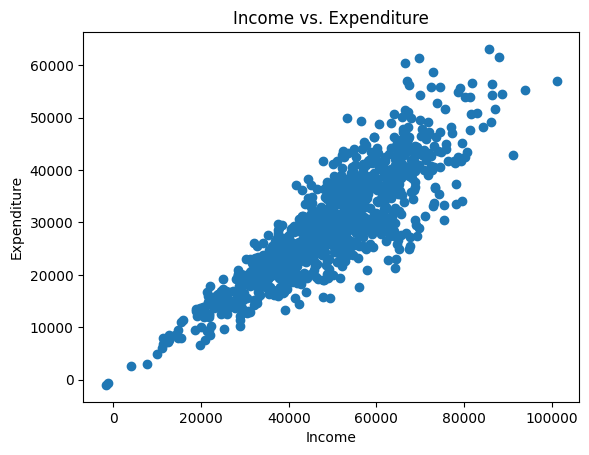

Filtered Data (Age > 50):     Age      Height     Weight        Income   Expenditure  Gender
1    62  156.226468  36.155842  37495.940106  20305.381495    Male
6    59  158.945948  50.291639  55778.624833  37853.279268  Female
8    72  180.283552  74.210829  64250.861376  27437.207315  Female
10   58  162.608792  64.363449  54689.826779  39528.146644    Male
12   75  163.528083  70.580730  46779.540578  28848.665514    Male
Age                      62
Height           156.226468
Weight            36.155842
Income         37495.940106
Expenditure    20305.381495
Gender                 Male
Name: 1, dtype: object


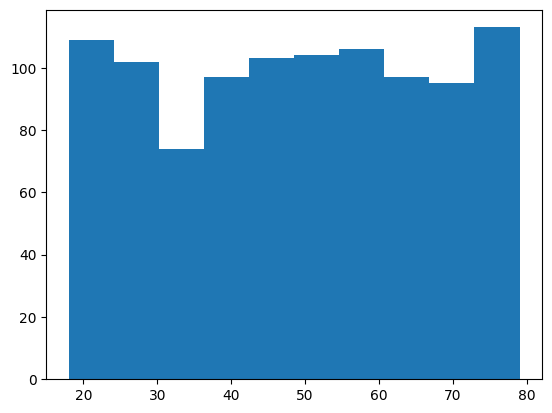

In [143]:
class AdvancedDataAnalyzer:
    """
    !!! DOC STRINGS FOR CLASS NEEDED
    """
    config: DataConfig = None
    _data: DataConfig = None
    _statistics: dict = {}

    def __init__(self, config: DataConfig):
      self.config = config
      self._data = self.config

    @property
    def data(self):
      return self.config.data

    @log_time
    def calculate_statistics(self) -> dict:
      mean = self.data.mean(numeric_only=True)
      median = self.data.median(numeric_only=True)
      var = self.data.var(numeric_only=True)
      corr = self.data.corr(numeric_only=True)

      statistics = {"mean": mean, "median": median, "variance": var, "correlation_matrix": corr}
      self._statistics = statistics

      return statistics

    def group_by_column(self, column=""):
      if not column in self._data.data:
        print(f"Column '{column}' does not exist.")
        return

      column_groups = self.data.groupby(by=[column]).mean()
      return column_groups

    def apply_function(self, column="", func=None):
      if not column in self._data.data:
        print(f"Column '{column}' does not exist.")
        return

      altered_column = self.data[column].apply(func)
      return altered_column

    def lazy_filter(self, column, condition):
      new_df: pd.DataFrame = self.data

      for index, row in self.data.iterrows():
        if condition(row[column]):
          yield row

      return

    def filter_data(self, column, condition):
      if not column in self._data.data:
        print(f"Column '{column}' does not exist.")
        return

      filtered = self.data[self.data[column].apply(condition)]

      return filtered

    def visualize_relationship(self, column_x, column_y):
      if not column_x in self._data.data:
        print(f"Column '{column_x}' does not exist.")
        return
      if not column_y in self._data.data:
        print(f"Column '{column_y}' does not exist.")
        return

      plt.scatter(self.data[column_x], self.data[column_y])
      plt.title(f"{column_x} vs. {column_y}")
      plt.xlabel(column_x)
      plt.ylabel(column_y)
      plt.show()

    def visualize_distribution(self, column):
      if not column in self._data.data:
        print(f"Column '{column}' does not exist.")
        return

      selected_column = self.data[column]
      plt.hist(selected_column)

      return

    @log_time
    def save_data(self, format, file_path, **kwargs):
      lower_format = format.lower()

      if lower_format == "csv":
        self.data.to_csv(path_or_buf=f"{file_path}.{format}")
        return
      elif lower_format == "parquet":
        self.data.to_parquet(path=f"{file_path}.{format}")
        return
      elif lower_format == "npz":
        np_array = self.data.to_numpy()
        np.savez(np_array, file=f"{file_path}.{format}")
        return
      else:
        print(f"'{format}' is an invalid format.")
        return

    def __repr__(self) -> str:
        """String representation of the class."""
        return f"AdvancedDataAnalyzer(config={str(self.config)})"


# Example function calls
if __name__ == "__main__":
    # Initialize DataConfig with default parameters
    config = DataConfig()

    # Create an AdvancedDataAnalyzer instance using the config
    analyzer = AdvancedDataAnalyzer(config)

    # Calculate statistics
    stats = analyzer.calculate_statistics()
    print("Statistics:", stats)

    # Group by Gender and calculate mean
    grouped_data = analyzer.group_by_column("Gender")
    print("Grouped by Gender:", grouped_data)

    # Apply a function to increase all Income by 10%
    increased_income = analyzer.apply_function("Income", lambda x: x * 1.1)
    print("Increased Income:", increased_income.head())

    # Save data to CSV
    analyzer.save_data(format='csv', file_path="synthetic_data")

    # Visualize relationship between Income and Expenditure
    analyzer.visualize_relationship("Income", "Expenditure")

    # Visualize Age distribution
    analyzer.visualize_distribution("Age")

    # Filter data using filter_data (e.g., Age > 50)
    filtered_data = analyzer.filter_data('Age', lambda x: x > 50)
    print("Filtered Data (Age > 50):", filtered_data.head())

    # Lazily filter data using lazy_filter
    filtered_rows = analyzer.lazy_filter('Age', lambda x: x > 50)
    for row in filtered_rows:
        print(row)
        break  # Print only the first match to save output length

# TEST

### Run following tests

**Expected Output**:

```text
test_data_generation (__main__.TestDataConfig) ... ok
test_data_randomness (__main__.TestDataConfig) ... ok
test_reactive_data_generation (__main__.TestDataConfig) ... ok
test_apply_function (__main__.TestAdvancedDataAnalyzer) ... ok
test_calculate_statistics (__main__.TestAdvancedDataAnalyzer) ... ok
test_filter_data (__main__.TestAdvancedDataAnalyzer) ... ok
test_group_by_column (__main__.TestAdvancedDataAnalyzer) ... ok
test_lazy_filter (__main__.TestAdvancedDataAnalyzer) ... ok
test_save_data (__main__.TestAdvancedDataAnalyzer) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.182s

OK
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
Execution time for calculate_statistics: 0.0035 seconds
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
Data saved to test_data.csv
Execution time for save_data: 0.0075 seconds
```

In [146]:
import unittest
import pandas as pd
import numpy as np
import pathlib

class TestDataConfig(unittest.TestCase):
    def setUp(self):
        # Initialize DataConfig with default parameters
        self.config = DataConfig()

    def test_data_generation(self):
        # Test if the data is generated correctly
        data = self.config.data
        self.assertIsInstance(data, pd.DataFrame)
        self.assertEqual(len(data), self.config.num_samples)
        self.assertIn('Age', data.columns)
        self.assertIn('Height', data.columns)
        self.assertIn('Weight', data.columns)
        self.assertIn('Income', data.columns)
        self.assertIn('Expenditure', data.columns)
        self.assertIn('Gender', data.columns)

    def test_reactive_data_generation(self):
        # Change num_samples and check if data regenerates
        old_data = self.config.data.copy()
        self.config.num_samples = 2000
        new_data = self.config.data
        self.assertNotEqual(len(old_data), len(new_data))
        self.assertEqual(len(new_data), 2000)

    def test_data_randomness(self):
        # Check if data generation respects random_seed
        self.config.random_seed = 123
        data1 = self.config.data.copy()
        self.config.random_seed = 123
        data2 = self.config.data.copy()
        pd.testing.assert_frame_equal(data1, data2)


class TestAdvancedDataAnalyzer(unittest.TestCase):

    def setUp(self):
        # Initialize DataConfig and AdvancedDataAnalyzer with default parameters
        self.config = DataConfig()
        self.analyzer = AdvancedDataAnalyzer(self.config)

    def test_calculate_statistics(self):
        # Test if statistics are calculated correctly
        stats = self.analyzer.calculate_statistics()
        self.assertIsInstance(stats, dict)
        self.assertIn('mean', stats)
        self.assertIn('median', stats)
        self.assertIn('variance', stats)
        self.assertIn('correlation_matrix', stats)

    def test_group_by_column(self):
        # Test if data is grouped correctly by Gender
        grouped_data = self.analyzer.group_by_column('Gender')
        self.assertIsInstance(grouped_data, pd.DataFrame)
        self.assertIn('Age', grouped_data.columns)

    def test_apply_function(self):
        # Test applying a custom function to the Income column
        increased_income = self.analyzer.apply_function('Income', lambda x: x * 1.1)
        self.assertIsInstance(increased_income, pd.Series)
        self.assertTrue(np.allclose(increased_income.values, self.config.data['Income'] * 1.1))

    def test_filter_data(self):
        # Test filtering data where Age > 50
        filtered_data = self.analyzer.filter_data('Age', lambda x: x > 50)
        self.assertTrue((filtered_data['Age'] > 50).all())

    def test_lazy_filter(self):
        # Test lazy filtering where Age > 50
        filtered_rows = list(self.analyzer.lazy_filter('Age', lambda x: x > 50))
        self.assertTrue(all(row['Age'] > 50 for row in filtered_rows))

    def test_save_data(self):
        #  Test saving data in CSV format by checking file existence using pathlib
        file_path = pathlib.Path("test_data.csv")
        # Ensure the file does not exist before the test
        if file_path.exists():
            file_path.unlink()
        # Save data in CSV format
        self.analyzer.save_data(format='csv', file_path="test_data")

        # Check if the file exists
        self.assertTrue(file_path.exists())

        # Cleanup the file after the test
        file_path.unlink()


# Run the tests in Jupyter Notebook
def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestDataConfig)
    suite.addTests(unittest.TestLoader().loadTestsFromTestCase(TestAdvancedDataAnalyzer))
    unittest.TextTestRunner(verbosity=2).run(suite)

# Execute tests
run_tests()

test_data_generation (__main__.TestDataConfig.test_data_generation) ... ok
test_data_randomness (__main__.TestDataConfig.test_data_randomness) ... ok
test_reactive_data_generation (__main__.TestDataConfig.test_reactive_data_generation) ... FAIL
test_apply_function (__main__.TestAdvancedDataAnalyzer.test_apply_function) ... ok
test_calculate_statistics (__main__.TestAdvancedDataAnalyzer.test_calculate_statistics) ... ok
test_filter_data (__main__.TestAdvancedDataAnalyzer.test_filter_data) ... ok
test_group_by_column (__main__.TestAdvancedDataAnalyzer.test_group_by_column) ... ok
test_lazy_filter (__main__.TestAdvancedDataAnalyzer.test_lazy_filter) ... ok
test_save_data (__main__.TestAdvancedDataAnalyzer.test_save_data) ... ok

FAIL: test_reactive_data_generation (__main__.TestDataConfig.test_reactive_data_generation)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1332309503.py", line 28, in test_reacti

New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
Execution time for calculate_statistics: 0.0034 seconds
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
New Data Generated!!!
Execution time for save_data: 0.0104 seconds
